#Construcción del modelo

La librería **scikit-learn** contiene muchos modelos, se acostumbra nombrarla como **sklearn**. <p> 
Es muy sencilla y popular para modelar datos almacenados como DataFrames.

Los pasos para construir un modelo son:


*   Definir el tipo de modelo y sus parámetros
*   Entrenar, capturar patrones de los datos
*   Predecir
*   Evaluar, determinar qué tan apropiada es la predicción





In [ ]:
#Consideremos nuevamente el ejemplo anterior con los datos de Melbourne housing

import pandas as pd
a = "https://raw.githubusercontent.com/mudgalvivek2911/VIVEK_Kaggle/f009482b3f22a151b86b098fbd6ad07f1bb7ac2a/Melbourne_housing_FULL.csv"
df1 = pd.read_csv(a)
df1.describe ()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [ ]:
df1 = df1.dropna(axis=0)
y = df1.Price
características = ['Rooms', 'Bathroom', 'Landsize', "Longtitude"]
X = df1[características]

In [ ]:
#Ejemplo para definir un modelo de árbol de decisión con scikit-learn
#y entrenarlo con las características y la variable objetivo definidas anteriormente
from sklearn.tree import DecisionTreeRegressor

#Definir el modelo para obtener siempre los mismos resultados
modelo = DecisionTreeRegressor (random_state = 1)

#Entrenamiento
modelo.fit (X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

Una vez construido el modelo se pueden realizar predicciones de nuevas casas, lo ideal sería del mercado pero .... utilicemos los datos de entrenamiento

In [ ]:
print ("Predicción de las siguientes 5 casas: ")
print (X.head ())
print ("Las predicciones son: ")
print (modelo.predict (X.head()))

Predicción de las siguientes 5 casas: 
    Rooms  Bathroom  Landsize  Longtitude
2       2       1.0     156.0    144.9934
4       3       2.0     134.0    144.9944
6       4       1.0     120.0    144.9941
11      3       2.0     245.0    144.9993
14      2       1.0     256.0    144.9954
Las predicciones son: 
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [ ]:
df1.head (5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


#Ejercicios 1

Tempo: 10 minutos

1. Leer el dataset [train.csv](https://www.kaggle.com/marcopale/housing?select=train.csv) en la variable casas



In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload ()
import io
casas = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (1).csv


2. Seleccionar la variable objetivo, que corresponde al precio de venta. Guardarla en la variable y. Necesitará imprimir la lista de las columnas para determinar el nombre que se necesita

In [ ]:
casas.---

In [ ]:
y = casas.SalePrice

3. Crear un DataFrame X con las características que se consideran predictivas. Crear antes una lista con las siguientes variables:
    * LotArea
    * YearBuilt
    * 1stFlrSF
    * 2ndFlrSF
    * FullBath
    * BedroomAbvGr
    * TotRmsAbvGrd

In [ ]:
#Crear una lista con las características de arriba
características = ---

# Seleccionar los datos correspondientes a las características
X = ---


In [ ]:
#Solución
características = ['Lot Area', 'Year Built','1st Flr SF','2nd Flr SF', 'Full Bath', 
                   'Bedroom AbvGr','TotRms AbvGrd']

# Seleccionar los datos correspondientes a las características
X = casas [características]

4. verificar cómo es X

In [ ]:
print (X)

5. Especificar y entrenar el modelo <p>

Crear un **DecisionTreeRegressor** y guardarlo como iowaModelo. <p>
entrenar el modelo usando **X **e **y**.

In [ ]:
iowaModelo = ---

# Entrenar el modelo
iowaModelo.fit (---)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

6. Hacer predicciones

Use X para predecir los datos

In [ ]:
predicciones = ---
print(predicciones)

7. Piense en los resultados obtenidos. Use head para comparar algunas predicciones

In [ ]:
print ---
print ---

#Validación del modelo

Medir la calidad del modelo permite mejorarlo iterativamente.<p>

En muchas aplicaciones se mide la veracidad (accuracy) de la predicción. <p>
Primero se necesita resumir la calidad del modelo para que sea entendible. Por ejemplo si se comparan los valores predecidos con los valores actuales de 10,000 casas, se tendría una mezcla de buenas y malas predicciones. Lo más conveniente sería tener una sóla métrica, que resumiera las predicciones.

Hay varias medidas, una es la llamada **Mean Absolute Error** (MAE). 

La predicción del **error** para cada casa es:


```
error = actual-predicción
```
Por ejemplo, si una casa cuesta `$150,000`  y la predicción es de `$100,000` el error es de `$50,000`.

Con esta métrica, se toma el valor absoluto de cada error y luego se obtiene el promedio.

Para calcular el MAE, primero se necesita un modelo:

In [ ]:
#Nuevas características
y = df1.Price
características = ['Rooms', 'Bathroom', 'Landsize', "BuildingArea",
                   "YearBuilt", "Lattitude", "Longtitude"]
X = df1[características]
#Definición del lmodelo
modelo1 = DecisionTreeRegressor ()
modelo1.fit (X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Una vez que se tiene el modelo se puede calcular el MAE
from sklearn.metrics import mean_absolute_error

predicción = modelo1.predict(X)
mean_absolute_error (y,predicción)


422.47102509283224

##El problema con los scores de la "muestra"

Lo que se acaba de calcular utiliza la muestra tanto para la construcción del modelo como para su evaluación, lo cual está mal, ya que las características de la muestra no pueden representar todos los casos, pero al evaluarlos parecerá que es adecuado.

Lo que se hace en la práctica es medir el rendimiento sobre datos que no se utilizaron para construir el modelo, estos datos se conocen como de **validación**.

Scikit-learn tiene la función **`train_test_split`** que permite hacerlo y entonces usar esta muestra para calcular el MAE.

In [ ]:
from sklearn.model_selection import train_test_split

#Dividir los datos de la muestra
train_X, val_X, train_y, val_y = train_test_split (X, y, random_state = 0)
modelo2 = DecisionTreeRegressor()
modelo2.fit (train_X, train_y)
val_predicciones = modelo2.predict (val_X)
print (mean_absolute_error(val_y, val_predicciones))

256149.30468046805


Antes el error era cercano a 500!! y ahora es más de 250,000.

Considerando que el valor promedio es cercano a 1.1 millones, el error es cercano a una cuarta parte.

#Ejercicios 2

Considere el modelo de "Ejercicios 1" 

Tiempo: 6 minutos

1. Dividir los datos
Use la función train_test_split con argumento random_state = 1 para verificar las funciones, utilice X e y

In [ ]:
trainX, valX, trainy, valy = train_test_split (X, y, random_state = 1 )

2. Especifique el modelo con DecisionTreeRegressor y entrénelo

In [ ]:
iowaModelo = ---
iowaModelo.fit (trainX, trainy)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Solución
iowaModelo = DecisionTreeRegressor(random_state=1)
iowaModelo.fit (trainX, trainy)

3. Realice predicciones con los datos de validación

In [ ]:
valPred = ---

In [ ]:
#Verifique los primeros 5-7 valores de las predicciones y 
#de los valores actuales usando los datos de validación
print (---)
print (---)

4. Calcular el MAE de los datos de validación

In [ ]:
mae =---
print (mae)

#Experimentación con diferentes modelos

En la práctica es común encontrar árboles con 10 o más divisiones, conforme se avanza en la profundidad del árbol en cada hoja hay menos casas. Por ejemplo, si sólo tiene una división, entonces los datos se dividen en 2 grupos. Si cada grupo se divide de nuevo, existirán 4 grupos. Si se continua dividiendo en 2, entonces habrá 2^10 grupos en el décimo nivel. 

Conforme se realiza la división habrá menos casos en cada hoja, lo que hará que las predicciones sean muy cercanas a los valores actuales, pero las predicciones serán poco fiables para nuevos datos. Esto se conoce como **overfitting**.

En el overfitting, el modelo mapea casi de manera perfecta los datos, pero es probre la validación con nuevos datos.

En el otro extremo, si un árbol divide sólo en 2 o 4, cada grupo tendrá una variedad muy amplia de objetos, y las predicciones podrían estar muy lejos. Cuando un modelo falla en capturar distinciones importantes y los patrones en los datos, se comparta probremente, aun en el entarenamiento. Esto se conoce como **underfitting**.

Debe existir un balance entre el underfitting y el overfitting.

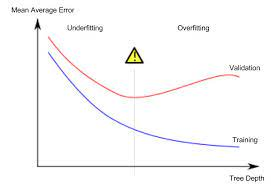

Existen varias alternativas para controlar la profundidad del árbol y varias permiten que una ruta sea mucho más larga que otras. 

El argumento `max_leaf_nodes` permite una manera sencilla de este control.

In [ ]:
from sklearn.metrics import mean_absolute_error

def getMAE (max_leaf_nodes, trainX, valX, trainy, valy):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(trainX, trainy)
    predsVal = model.predict(valX)
    mae = mean_absolute_error(valy, predsVal)
    return(mae)

Se puede tener un ciclo que permita comparar la eficiencia del modelo construido con diferentes valores:

In [ ]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    mae = getMAE (max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max nodos hoja: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, mae))

Max nodos hoja: 5  		 Mean Absolute Error:  36533
Max nodos hoja: 50  		 Mean Absolute Error:  26165
Max nodos hoja: 500  		 Mean Absolute Error:  28259
Max nodos hoja: 5000  		 Mean Absolute Error:  29593


Con estas opciones, 500 es el número optimo de hojas

#Conclusiones

Los modelos pueden sufrir de:

*   overfitting: capturan demasiados patrones, que tal vez no ocurran en el futuro, haciendo las predicciones menos adecuadas
*   underfitting: no capturan los patrones relevantes, las predicciones no son adecuadas.



<img src="https://www.aprendemachinelearning.com/wp-content/uploads/2017/12/generalizacion-machine-learning.png" />

## Ejercicios 3

Considerar el modelo construido en Ejercicios 2

**Paso 1: Comparar árboles de diferente tamaño** <p>

Escribir un ciclo con los siguientes valores máximos para el número de hoja. Invoque a la función getMAE con cada uno de esos valores y almacena la salida de tal forma que permita seleccionar el valor de la mejor predicción

In [ ]:
candidatos =  [5,25,50, 100, 250, 500]
#Escriba un ciclo para encontrar el árbol de tamaño ideal de entre candidatos
scores = {n:getMAE (n, trainX, valX, trainy, valy) for n in candidatos}
#guardar el mejor valor de candidatos
mejor = min (scores, key = scores.get)
print (mejor)
#imprima una gráfica candidatos vs. scores


100


In [ ]:
trainX.columns

Index(['Lot Area', 'Year Built', '1st Flr SF', '2nd Flr SF', 'Full Bath',
       'Bedroom AbvGr', 'TotRms AbvGrd'],
      dtype='object')

Paso 2: Ajustar el modelo usando todos los datos

Ya que se sabe el mejor tamaño del árbol, se pueden usar todos los datos (sin considerar los de validación)

In [ ]:
Usar el mejor tamaño
modeloFinal = ---
#Entrenar el modelo con todos los ejemplos
---

#Random Forest

Los árboles de decisión tienen el problema del underfitting y del overfitting.

Random forest usa muchos árboles de decisión, y hace la predicción como el promedio de las predicciones de cada componente. En general tiene una mejor predicción que un sólo árbol y trabaja bien con parámetros por defaúlt.


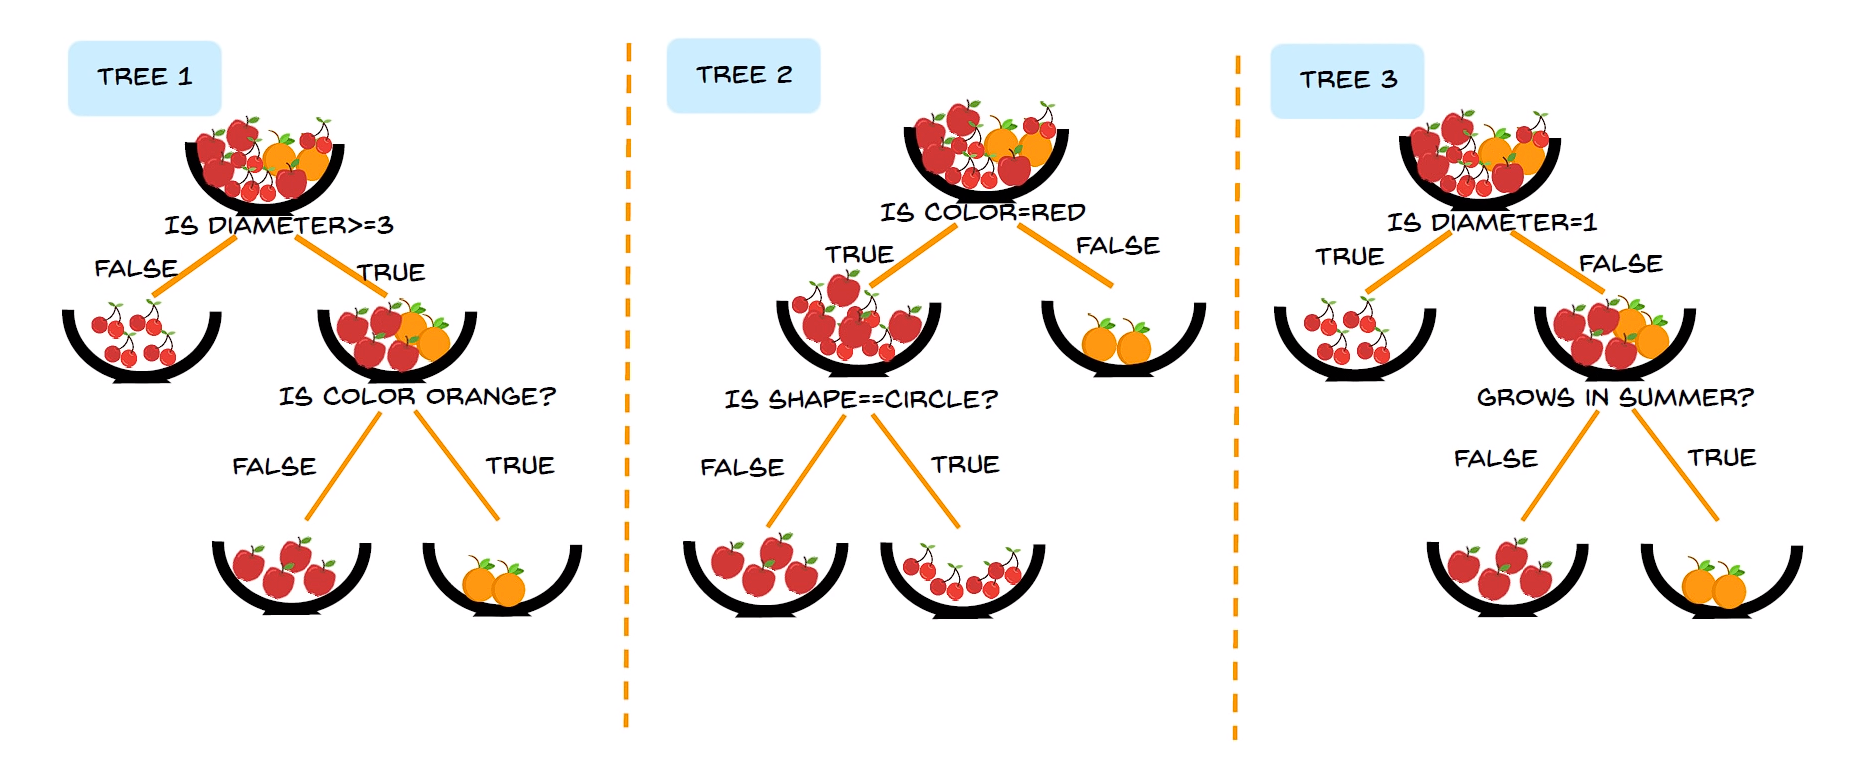

Considere nuevamente los datos de Melbourne housing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
a = "https://raw.githubusercontent.com/mudgalvivek2911/VIVEK_Kaggle/f009482b3f22a151b86b098fbd6ad07f1bb7ac2a/Melbourne_housing_FULL.csv"
df = pd.read_csv(a)
#Quitar los valores faltantes
df = df.dropna (axis = 0)
#Seleccionar objetivo y características
y = df.Price
características = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea',
                   'YearBuilt', 'Lattitude', 'Longtitude']
X = df[características]
#Divide el dataset en entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split (X,y,random_state = 0)

La construcción de un modelo random forest es similar a la construcción del árbol de decisión en scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forestModel = RandomForestRegressor (random_state = 1)
forestModel.fit (train_X, train_y)
preds = forestModel.predict (val_X)
print (mean_absolute_error(val_y, preds))

177608.31406454928


#Ejercicio 1

Considerar el data set de las casas de Iowa, visto anteriormente

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

uploaded = files.upload ()
import io
casasIowa = pd.read_csv(io.BytesIO(uploaded['train.csv']))
#objetivo
y = casasIowa.SalePrice
#Crear X
característicasIowa = ['Lot Area', 'Year Built', '1st Flr SF', '2nd Flr SF',
                       'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd']
X = casasIowa [característicasIowa]

# Dividir en entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Específicar modelo
iowaModel = DecisionTreeRegressor(random_state=1)
# Entrenar modelo
iowaModel.fit(train_X, train_y)
# Validación de predicción y calculo del mae
valPredicciones = iowaModel.predict(val_X)
valMAE = mean_absolute_error(valPredicciones, val_y)
print("Validación MAE sin especificar max_leaf_nodes: {:,.0f}".format(valMAE))

# Usar el mejor valor para max_leaf_nodes
iowaModel = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1) #se calculó antes
iowaModel.fit(train_X, train_y)
valPredicciones = iowaModel.predict(val_X)
valMAE = mean_absolute_error(valPredicciones, val_y)
print("Validación MAE para el mejor valor de max_leaf_nodes: {:,.0f}".format(valMAE))



Saving train.csv to train (2).csv
Validación MAE sin especificar max_leaf_nodes: 30,575
Validación MAE para el mejor valor de max_leaf_nodes: 25,684


Paso 1: Crear un modelo Random Forest



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo usando random_state igual 1
rf_model = RandomForestRegressor(random_state = 1)

# Entrenar el modelo
rf_model.fit (train_X, train_y)

# Calcular el mae con los datos de validación
rf_val_mae = mean_absolute_error (rf_model.predict (val_X), val_y)

print("Validación MAE para el Modelo Random Forest: {:,.0f}".format(rf_val_mae))


Validación MAE para el Modelo Random Forest: 22,325


#Paso 2: Experimentar utilizando más características, de tal forma que se mejore el rendimiento (Trabajo por equipos de 2 alumnos)

#SVM

## **SUPPORT VECTOR MACHINE**

Aprendizaje supervisado, asigna a nuevos datos a una categoría dada. Puede ser visto como un clasificador lineal binario no-probabilístico.

Originalmente desarrollado por Valdimir N Vapnik y Alexey Ya. Chervonenkis en 1963, sólo se trabajaba con hiperplanos. En 1992, Bernhard E. Boser, Isabelle M Guyon y Valdimir N Vapnik sugierieron clasificadores no lineales. El algoritmo que se utiliza actualmente fue publicado en 1995 por Corinna Cortes y Vapnik


El objetivo de optimización es maximizar el margen, definido como la distancia que separa el límite de decisión y los ejemplos de entrenamiento más cercanos.

<img src = "https://miro.medium.com/max/1125/1*z5UvkNnPGdudZp92uZgmNw.png" />


Es útil para dataset pequeños, ya que no es efectivo para grandes volúmenes de información.

**Terminología**

<img src = "https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png" />

Los **vectores de soporte** son puntos especiales en el dataset, responsables  de la construcción del hiperplano y son los más cercanos a él. Si se eliminarán la posición del hiperplano se alteraría.

Los **límites de decisión** son las líneas que se ven a lo largo del hiperplano, la distancia entre ambas es llamado el **margen**.

El **hiperplano** es la línea central del diagrama anterior en 2D. Si fuera 3D sería un plano.

La ecuación de un hiperplano es una ecuación lineal
$a_0 + a_1x_1 +  a_0 + a_2x_2 + ... + a_nx_n $

Si se trabaja en 2D $x_1$ y $x_2$ definirian el primero y el segundo eje.

En SVMs el objetivo principal es seleccionar un hiperplano con el máximo margen posible entre los vectores de soporte de un dataset.

La búsqueda ser realiza en dos pasos

1. Generar hiperplanos que separen las clases lo mejor posible, hay muchos y se debe buscar el mejor (representa el margen más grande entre las dos clases)
2. Seleccionar el mejor hiperplano. Si existe se define como el *maximum margin classifier*.

##Ejemplo 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


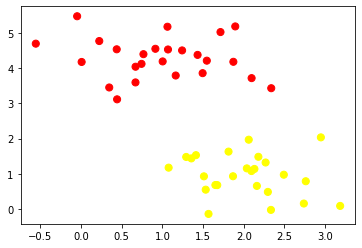

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

#Generación de puntos
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Se podría trazar una recta para separar los dos conjuntos de datos y así crear un modelo de clasificación, pero .... hay un problema, hay más de formas de crear la línea

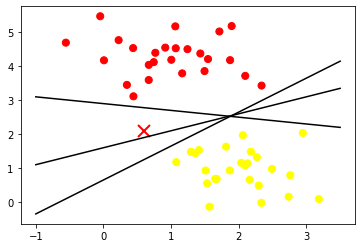

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=12)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

¿Cuál seleccionar?

Dado un punto, por ejemplo el marcado con "X", se le asignaría una etiqueta diferente dependiendo de la recta seleccionada.

Por lo que no es suficiente dibujar una línea, sería mejor considerar un margen

(-1.0, 3.5)

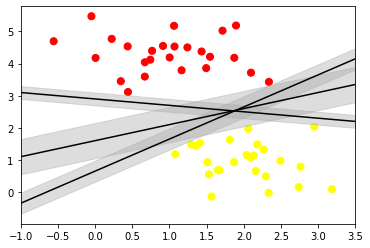

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

En SVM, la línea que maximiza este margen es el que se selecciona como el modelo óptimo.
   


###Trabajando con scikit-learn

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [ ]:
from sklearn.svm import SVC #Support vector classifier
model = SVC (kernel = 'linear', C = 1E10)
model.fit (X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Graficar la función de decisión para SVC en 2D """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # crear una red para evaluar el modelo
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # pone límites de decisión y márgenes
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # pone vectores de soporte
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=110, linewidth=1, facecolors='g')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

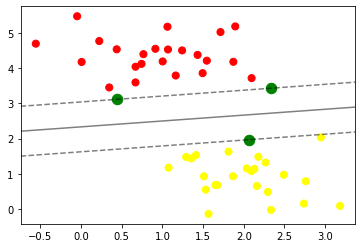

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Los puntos que están sobre las líneas punteadas se conocen como los vectores de soporte

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Los vectores de soporte son clave en el clasificador, normalmente no cambian ni en posición ni en número.

Considere un número diferente de blobs:

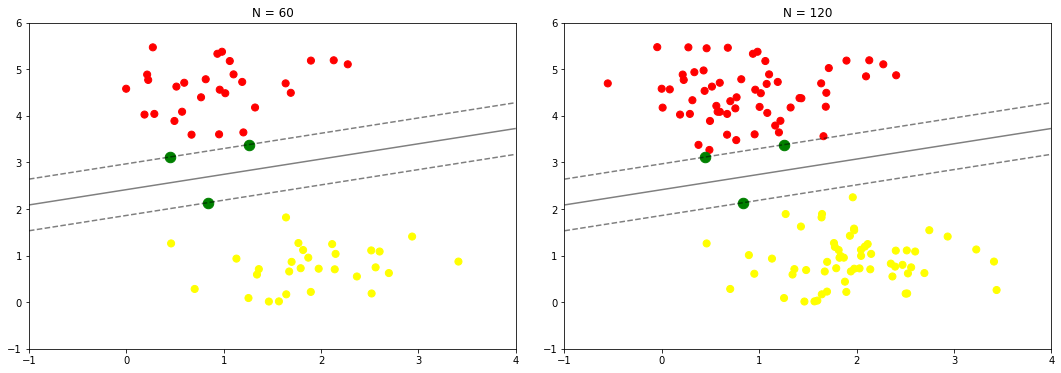

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

La función ipywidgets.interact crea automaticamente interfaces de usuario (UI).

Mayor información en: [using interact](https://colab.research.google.com/github/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb#scrollTo=swjEQF1nqf7z) 


también en: [widgets](https://towardsdatascience.com/create-interactive-tools-in-google-colab-using-widgets-8a1a504d3b7e)

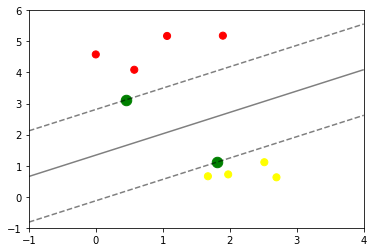

In [ ]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 50, 60, 200], ax=fixed(None));

##Ejemplo 1




Se usara el cancer dataset, que describe 30 características del núcleo de la celula presente en la imagen. Clases: maligno y benigno

In [16]:
#Lectura del dataset desde sklearn
from sklearn import datasets
cancer = datasets.load_breast_cancer() 

Exporación de los datos

In [17]:
#nombre de las características
print ("Características: ", cancer.feature_names)
#Tipos de cancer
print ("Etiquetas: ", cancer.target_names)
#Forma
print ("Tabla de ", cancer.data.shape)

Características:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Etiquetas:  ['malignant' 'benign']
Tabla de  (569, 30)


In [18]:
#características de los primeros 5 ejemplos
print (cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

División de los datos en entrenamiento y prueba,con la función train_test_split ()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(cancer.data, cancer.target,
                                            test_size = 0.3, random_state=109)

Generación del modelo

In [24]:
from sklearn import svm
#creación del clasificador
clasif = svm.SVC(kernel='linear')
clasif.fit (X_train, y_train)

#predicción con el dataset de prueba
y_pred = clasif.predict(X_test)


Evaluación del modelo

*   accuracy, predicciones correctas entre total de predicciones


In [23]:
from sklearn import metrics

print ("Accuracy: ", metrics.accuracy_score (y_test,y_pred))

Accuracy:  0.9649122807017544


##**Métricas de clasificación**

Hay muchas métricas usadas en ML



*   Matriz de confusión
*   Accuracy
*   Recall o sensibilidad
*   Precision
*   Especificidad 
*   F1-Score
*   Área bajo la curva  (ROC)
*   Pérdida logarítimica
*   Cohen's Kappa

**Matriz de confusión**

Tabla que describe el rendimiento de un modelo supervisado:   

<img src = "https://www.aprendemachinelearning.com/wp-content/uploads/2019/05/confusion_matix_example-1024x1024.png" />





In [25]:
print ("Matriz de confusión: \n", metrics.confusion_matrix (y_true=y_test, y_pred=y_pred))
print ("Accuracy: ", metrics.accuracy_score (y_test,y_pred))
print ("Precisión: ", metrics.precision_score(y_test,y_pred))
print ("Recall: ", metrics.recall_score(y_test, y_pred))


Matriz de confusión: 
 [[ 61   2]
 [  4 104]]
Accuracy:  0.9649122807017544
Precisión:  0.9811320754716981
Recall:  0.9629629629629629


<img src = "https://cdn-images-1.medium.com/max/1000/1*BTB9weIUfSsSRy5kvh_-uA.png" />

Datos NO linealmente separables

Considere el siguiente conjunto de datos

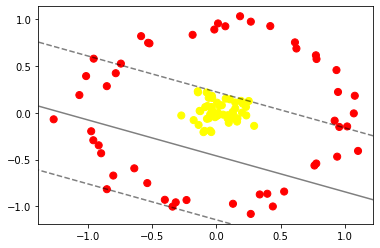

In [46]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Una forma sencilla de volverlo linealmente separable es aumentar su dimensionalidad. 

Se conoce como el kernel trick

In [50]:
r = np.exp (-(X**2).sum (1))

In [51]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=150, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 30, 90], azim=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=1, options=(-90, 30, 90), value=30), IntSlider(value=…

## **Tipos de Kernels:**   

Lineal

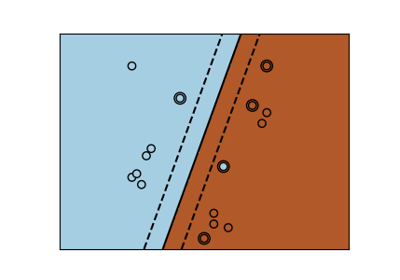

Polinomial

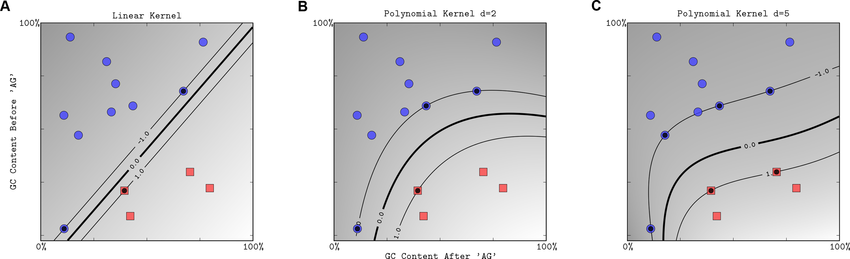

Radial

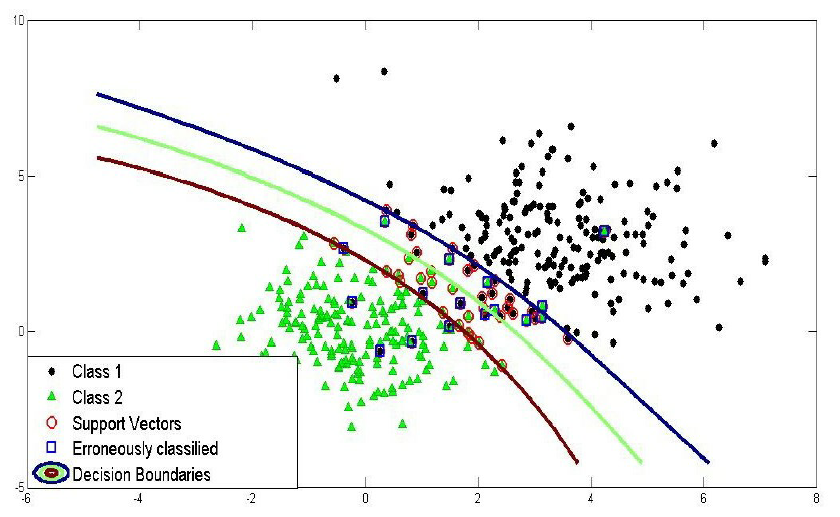

Sigmoide

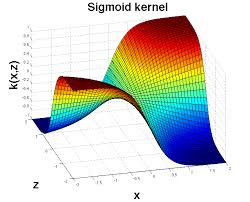

##**Librerías scikit-learn para SVM**

[SVM](https://scikit-learn.org/stable/modules/svm.html)

Clasificadores

LinearSVC, kernel lineal
SVC
NuSVC, controla el número de vectores de soporte

Como parámetro el tipo de kernel: poly, linear, sigmoid o una función



##Ejemplo 2 Pulsar Star

<img src = "https://cdn.mos.cms.futurecdn.net/43AazVpb9XwmZbPkwkrBbL.jpg" />

https://www.space.com/32661-pulsars.html


##Ejercicio SVM - Iris

Aplicar SVM al dataset iris utilice kernel polinomiales, gaussiano (kernel = 'rbf') y  sigmoide. Para cada tipo de kernel evalúe el modelo y al final compare todos los tipos.

versicolor

<img src = "https://ichi.pro/assets/images/max/724/1*f6KbPXwksAliMIsibFyGJw.png" />

Trabajo en equipos de 3 personas

Tiempo estimado : 25 minutos

In [ ]:
from sklearn import datasets

print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========